In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [43]:
data=pd.read_csv('loan_prediction.csv')
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [45]:
data.shape

(614, 13)

In [46]:
for i in data.columns:
    print(data[i].value_counts())
    print('\n')

LP001002    1
LP002328    1
LP002305    1
LP002308    1
LP002314    1
           ..
LP001692    1
LP001693    1
LP001698    1
LP001699    1
LP002990    1
Name: Loan_ID, Length: 614, dtype: int64


Male      489
Female    112
Name: Gender, dtype: int64


Yes    398
No     213
Name: Married, dtype: int64


0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64


Graduate        480
Not Graduate    134
Name: Education, dtype: int64


No     500
Yes     82
Name: Self_Employed, dtype: int64


2500    9
4583    6
6000    6
2600    6
3333    5
       ..
3244    1
4408    1
3917    1
3992    1
7583    1
Name: ApplicantIncome, Length: 505, dtype: int64


0.0       273
2500.0      5
2083.0      5
1666.0      5
2250.0      3
         ... 
2791.0      1
1010.0      1
1695.0      1
2598.0      1
240.0       1
Name: CoapplicantIncome, Length: 287, dtype: int64


120.0    20
110.0    17
100.0    15
160.0    12
187.0    12
         ..
240.0     1
214.0     1
59.0      1
166.0     1
253

In [47]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()

In [48]:
for i in data.columns:
    if data[i].dtype=='object':
        data[i]=oe.fit_transform(data[i].values.reshape(-1,1))

In [49]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0.0,1.0,0.0,0.0,0.0,0.0,5849,0.0,NaN,360.0,1.0,2.0,1.0
1,1.0,1.0,1.0,1.0,0.0,0.0,4583,1508.0,128.0,360.0,1.0,0.0,0.0
2,2.0,1.0,1.0,0.0,0.0,1.0,3000,0.0,66.0,360.0,1.0,2.0,1.0
3,3.0,1.0,1.0,0.0,1.0,0.0,2583,2358.0,120.0,360.0,1.0,2.0,1.0
4,4.0,1.0,0.0,0.0,0.0,0.0,6000,0.0,141.0,360.0,1.0,2.0,1.0


In [50]:
data.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [51]:
data['Gender']=data['Gender'].fillna(data['Gender'].mode()[0])
data['Married']=data['Married'].fillna(data['Married'].mode()[0])
data['Dependents']=data['Dependents'].fillna(data['Dependents'].mode()[0])
data['Self_Employed']=data['Self_Employed'].fillna(data['Self_Employed'].mode()[0])
data['LoanAmount']=data['LoanAmount'].fillna(data['LoanAmount'].mean())
data['Loan_Amount_Term']=data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].median())
data['Credit_History']=data['Credit_History'].fillna(data['Credit_History'].mode()[0])

In [52]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [53]:
data.describe()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,306.500000,0.817590,0.653094,0.744300,0.218241,0.133550,5403.459283,1621.245798,146.412162,342.410423,0.855049,1.037459,0.687296
std,177.390811,0.386497,0.476373,1.009623,0.413389,0.340446,6109.041673,2926.248369,84.037468,64.428629,0.352339,0.787482,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000
25%,153.250000,1.000000,0.000000,0.000000,0.000000,0.000000,2877.500000,0.000000,100.250000,360.000000,1.000000,0.000000,0.000000
50%,306.500000,1.000000,1.000000,0.000000,0.000000,0.000000,3812.500000,1188.500000,129.000000,360.000000,1.000000,1.000000,1.000000
75%,459.750000,1.000000,1.000000,1.000000,0.000000,0.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000,2.000000,1.000000
max,613.000000,1.000000,1.000000,3.000000,1.000000,1.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000,2.000000,1.000000


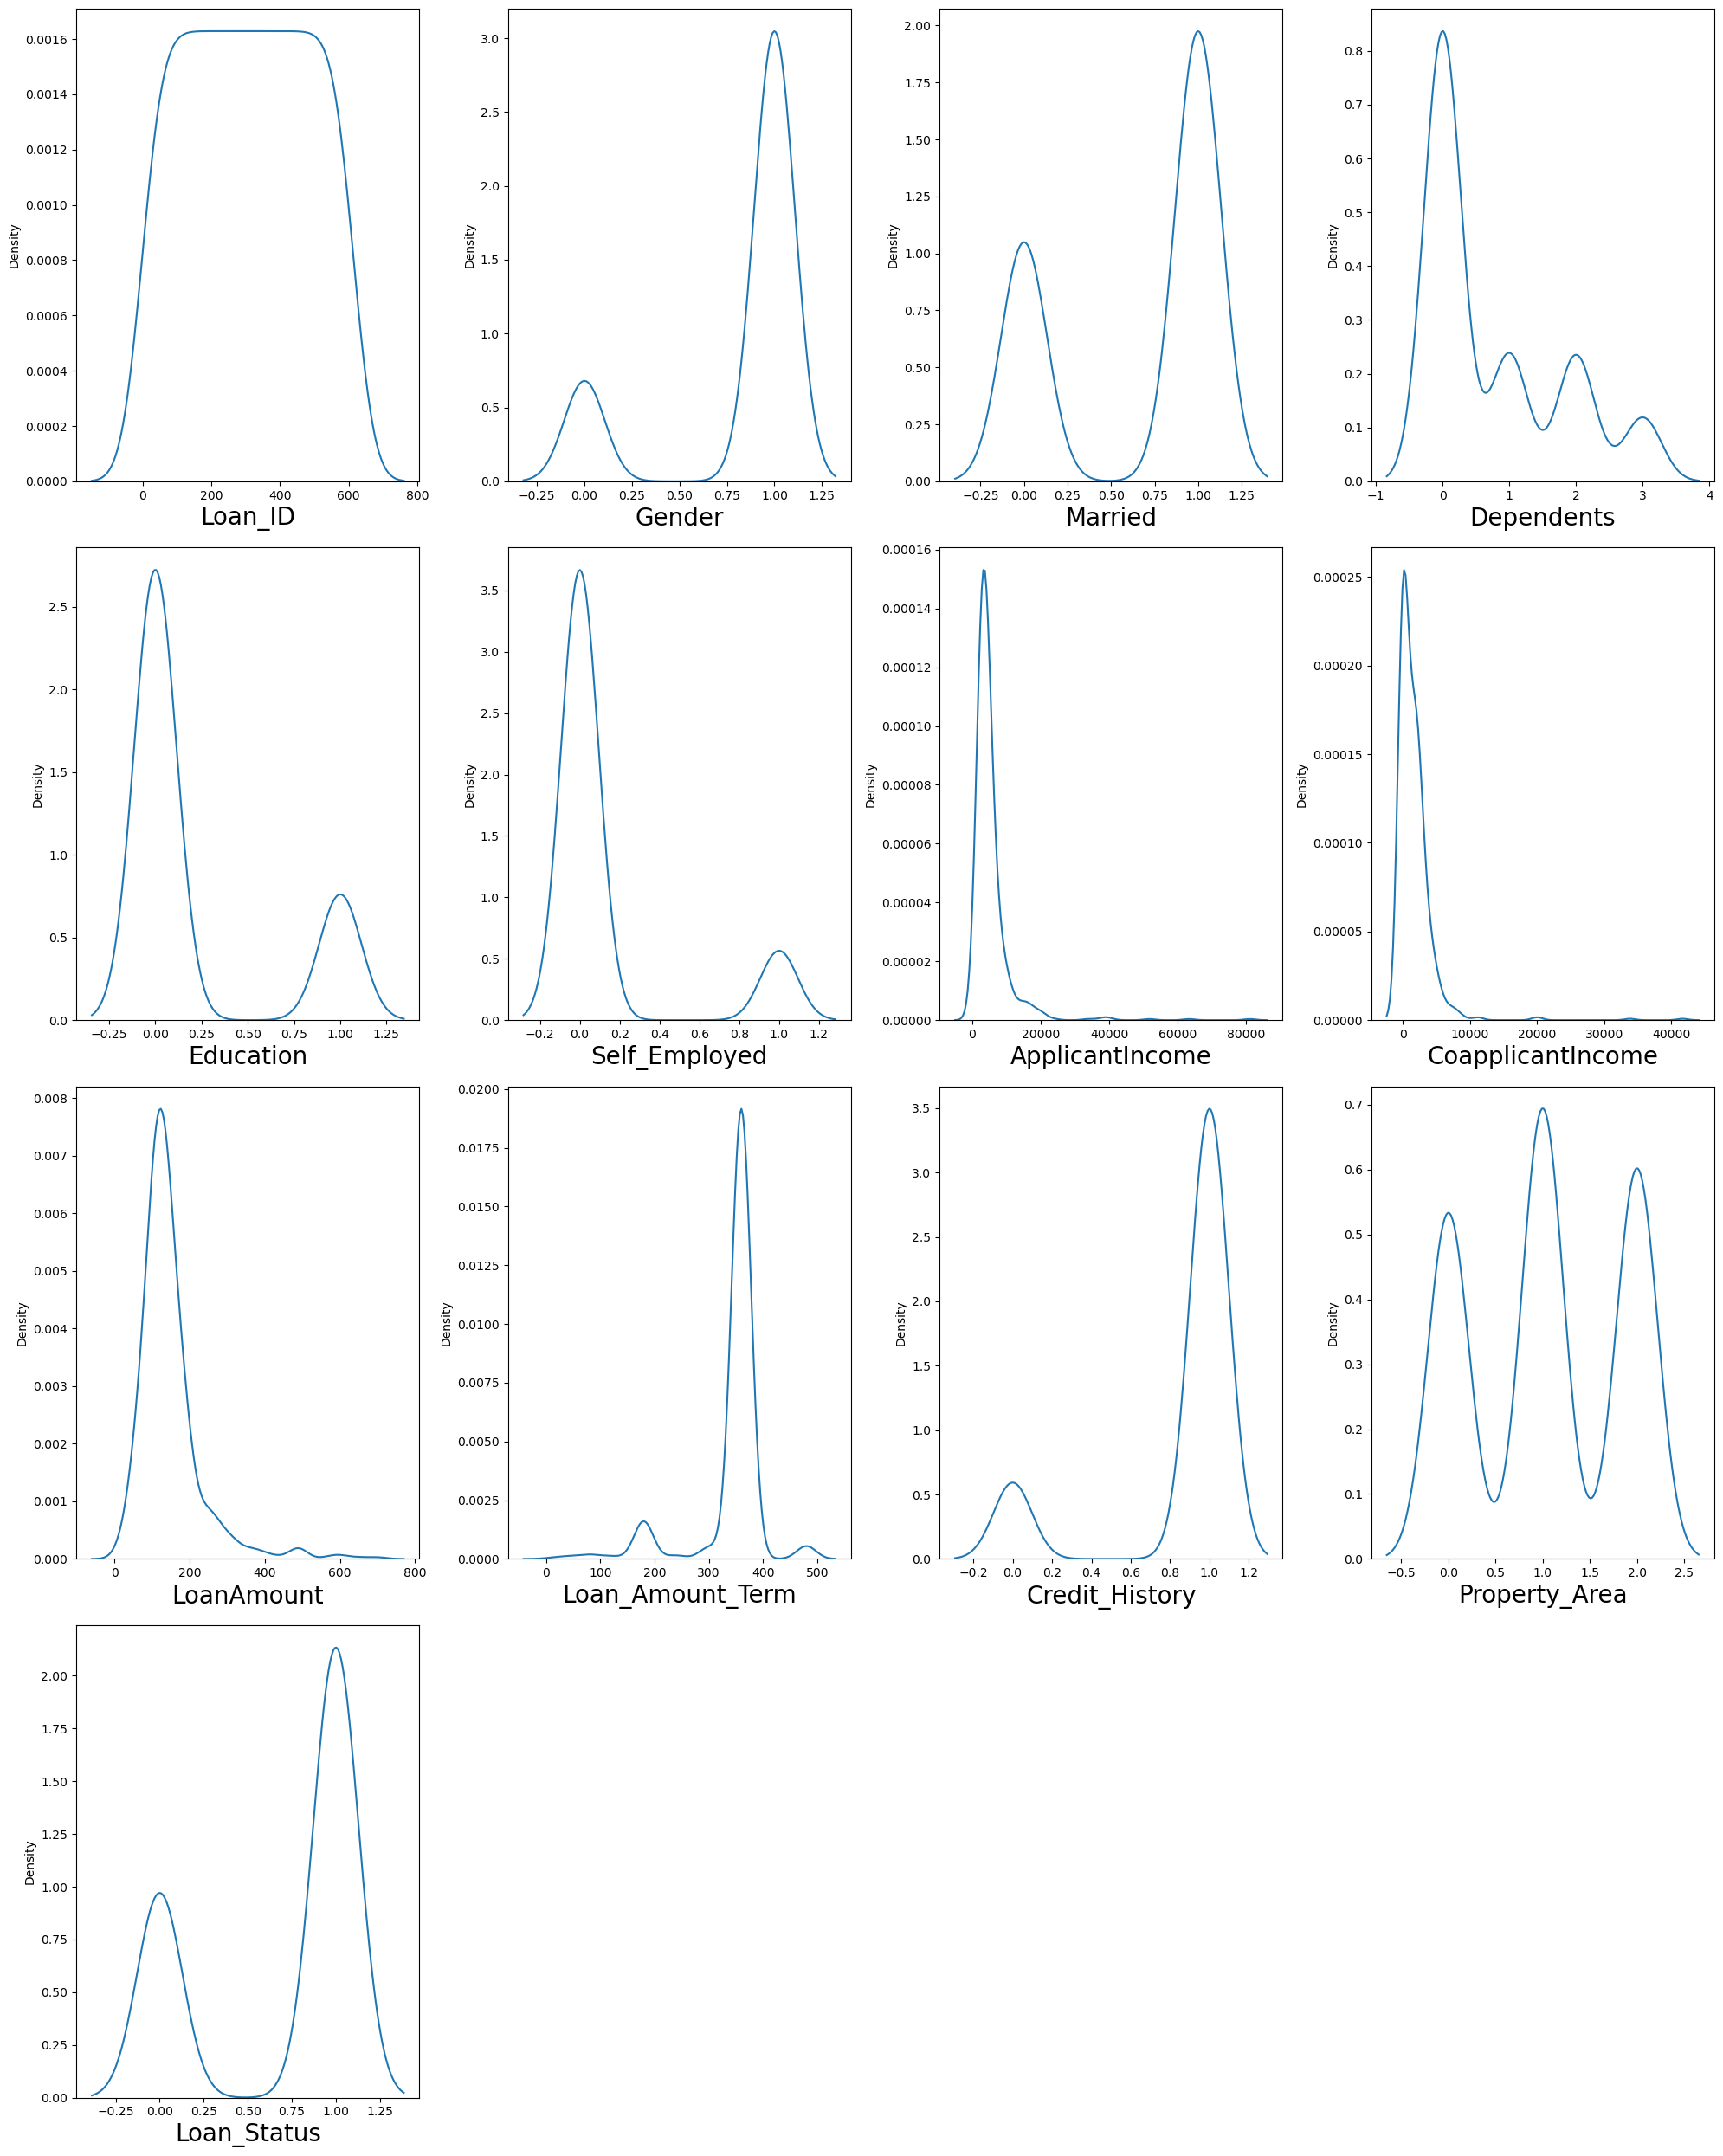

In [54]:
plt.figure(figsize=(20,25))
plot=1
for i in data.columns:
    if plot<=15:
        ax=plt.subplot(4,4,plot)
        sns.kdeplot(data[i])
        plt.xlabel(i,fontsize=20)
    plot+=1
plt.tight_layout()

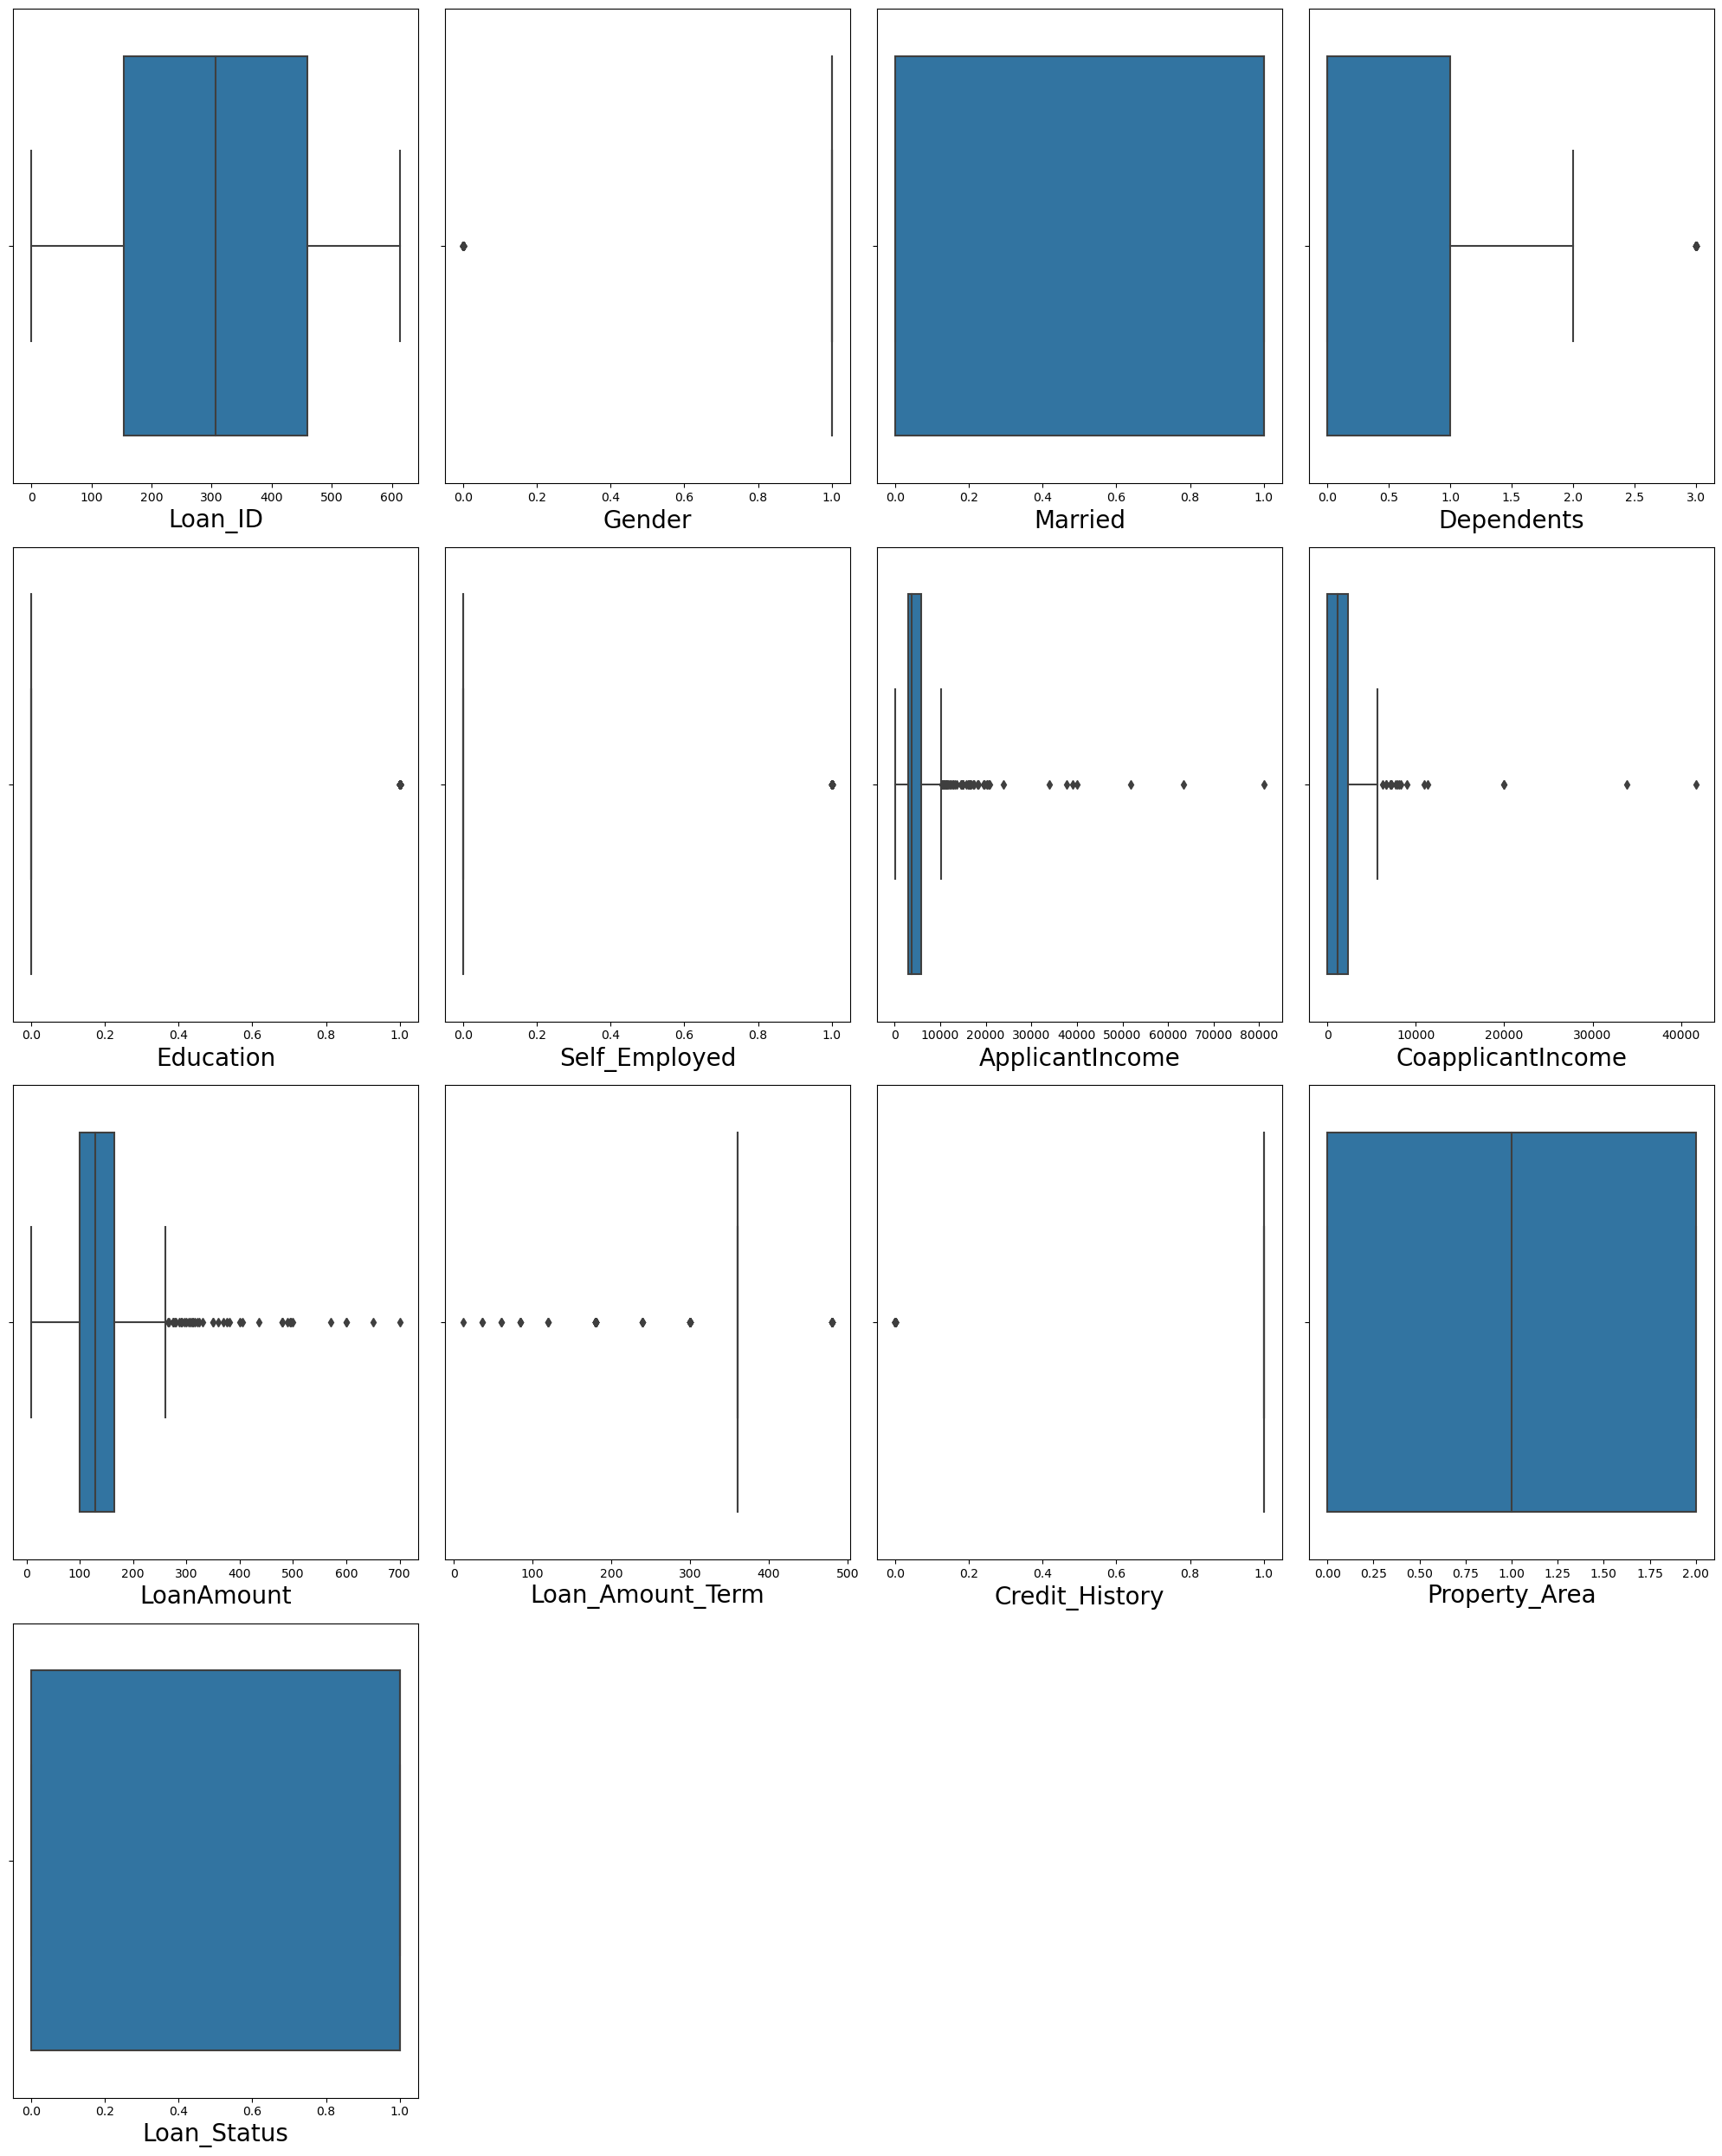

In [55]:
plt.figure(figsize=(20,25))
plot=1
for i in data.columns:
    if plot<=15:
        ax=plt.subplot(4,4,plot)
        sns.boxplot(data[i])
        plt.xlabel(i,fontsize=20)
    plot+=1
plt.tight_layout()

In [56]:
q1=data.quantile(.25)
q3=data.quantile(.75)
iqr=q3-q1
iqr

Loan_ID               306.50
Gender                  0.00
Married                 1.00
Dependents              1.00
Education               0.00
Self_Employed           0.00
ApplicantIncome      2917.50
CoapplicantIncome    2297.25
LoanAmount             64.50
Loan_Amount_Term        0.00
Credit_History          0.00
Property_Area           2.00
Loan_Status             1.00
dtype: float64

In [57]:
ai_h=q3.ApplicantIncome+(iqr.ApplicantIncome)
ind_num=np.where(ai_h<data['ApplicantIncome'])
data=data.drop(data.index[ind_num])
data.reset_index()
data.shape

(542, 13)

In [58]:
cai_h=q3.CoapplicantIncome+(iqr.CoapplicantIncome)
ind_num=np.where(cai_h<data['CoapplicantIncome'])
data=data.drop(data.index[ind_num])
data.reset_index()
data.shape

(510, 13)

In [59]:
la_h=q3.LoanAmount+(iqr.LoanAmount)
ind_num=np.where(la_h<data['LoanAmount'])
data=data.drop(data.index[ind_num])
data.reset_index()
data.shape

(492, 13)

In [60]:
x=data.drop(columns='Loan_Status')
y=data.Loan_Status

In [61]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()

In [62]:
x=pd.DataFrame(ss.fit_transform(x),columns=x.columns)

In [63]:
x.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,-1.708936,0.492366,-1.339946,-0.707382,-0.599263,-0.347461,1.333555,-0.981266,0.663833,0.253252,0.430746,1.236353
1,-1.703331,0.492366,0.746299,0.307288,-0.599263,-0.347461,0.503315,0.223120,0.184322,0.253252,0.430746,-1.314111
2,-1.697725,0.492366,0.746299,-0.707382,-0.599263,2.878023,-0.534814,-0.981266,-1.430352,0.253252,0.430746,1.236353
3,-1.692120,0.492366,0.746299,-0.707382,1.668717,-0.347461,-0.808282,0.901984,-0.024023,0.253252,0.430746,1.236353
4,-1.686515,0.492366,-1.339946,-0.707382,-0.599263,-0.347461,1.432581,-0.981266,0.522883,0.253252,0.430746,1.236353


In [64]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [65]:
vif=pd.DataFrame()
vif['values']=[variance_inflation_factor(x,i) for i in range(x.shape[1])]
vif['columnes']=x.columns
vif

,values,columnes
0,1.041332,Loan_ID
1,1.210572,Gender
2,1.448482,Married
3,1.252859,Dependents
4,1.053070,Education
5,1.046348,Self_Employed
6,1.718056,ApplicantIncome
7,1.645357,CoapplicantIncome
8,1.690105,LoanAmount
9,1.072743,Loan_Amount_Term


In [67]:
from sklearn.model_selection import train_test_split

In [68]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=56)

In [70]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [71]:
lr.fit(x_train,y_train)

LogisticRegression()

In [72]:
lr.score(x_train,y_train)

0.8292682926829268

In [73]:
lr.score(x_test,y_test)

0.8130081300813008

In [74]:
y_pred=lr.predict(x_test)

In [83]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,roc_curve,auc

In [77]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.96      0.50      0.66        44
         1.0       0.78      0.99      0.87        79

    accuracy                           0.81       123
   macro avg       0.87      0.74      0.76       123
weighted avg       0.84      0.81      0.79       123



In [79]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[22, 22],
       [ 1, 78]], dtype=int64)

In [82]:
cm[1:1]

array([], shape=(0, 2), dtype=int64)

In [85]:
fpr,tpr,threshold=roc_curve(y_test,y_pred)
print('fpr=',fpr)
print('tpr=',tpr)
print('threshold',threshold)

fpr= [0.  0.5 1. ]
tpr= [0.         0.98734177 1.        ]
threshold [2. 1. 0.]


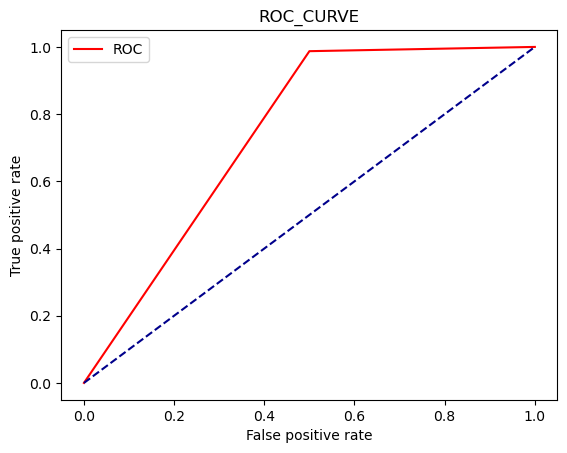

In [90]:
plt.plot(fpr,tpr,color='red',label='ROC')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC_CURVE')
plt.legend()
plt.show()

In [91]:
accuracy_score(y_test,y_pred)

0.8130081300813008